Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats   # for QQ plot & p-values
from sklearn.linear_model import LinearRegression

# display plots inline (works in Jupyter/Colab)
%matplotlib inline


In [2]:
# If running on Colab, first upload the file manually:
# from google.colab import files
# uploaded = files.upload()

# Then load dataset:
df = pd.read_csv("Boston.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (506, 15)
Columns: ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
target_col = "medv"
y = df[target_col].values.reshape(-1, 1)

predictor_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]
X_all = df[predictor_cols].values

print("Target:", target_col)
print("Predictors:", predictor_cols)


Target: medv
Predictors: ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [4]:
corrs = df[predictor_cols].corrwith(df[target_col])
corrs_sorted = corrs.abs().sort_values(ascending=False)

print("Top predictors by absolute correlation:\n", corrs_sorted.head())

best_single = corrs_sorted.index[0]
print("Best predictor for Simple Linear Regression:", best_single)


Top predictors by absolute correlation:
 lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
dtype: float64
Best predictor for Simple Linear Regression: lstat


In [5]:
x = df[best_single].values.reshape(-1, 1)
X_slr = np.hstack([np.ones((len(x), 1)), x])   # add intercept

# Normal equation: beta = (X^T X)^(-1) X^T y
XtX = X_slr.T @ X_slr
XtX_inv = np.linalg.inv(XtX)
Xty = X_slr.T @ y
beta_hat_slr = XtX_inv @ Xty

print("SLR coefficients [intercept, slope]:", beta_hat_slr.ravel())

# Predictions & residuals
y_hat_slr = X_slr @ beta_hat_slr
residuals_slr = y - y_hat_slr

# Metrics
SSE_slr = np.sum(residuals_slr**2)
SST = np.sum((y - y.mean())**2)
SSR_slr = np.sum((y_hat_slr - y.mean())**2)
R2_slr = SSR_slr / SST
adjR2_slr = 1 - (SSE_slr/(len(y)-2)) / (SST/(len(y)-1))

print(f"SLR R^2 = {R2_slr:.4f}, Adjusted R^2 = {adjR2_slr:.4f}")


SLR coefficients [intercept, slope]: [34.55384088 -0.95004935]
SLR R^2 = 0.5441, Adjusted R^2 = 0.5432


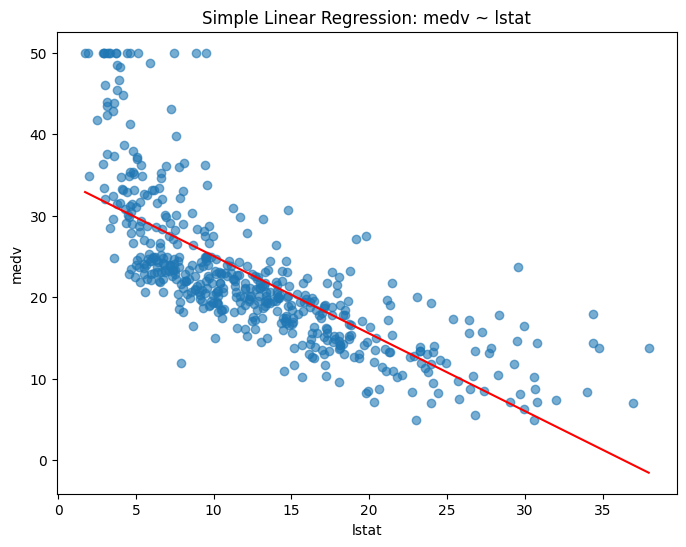

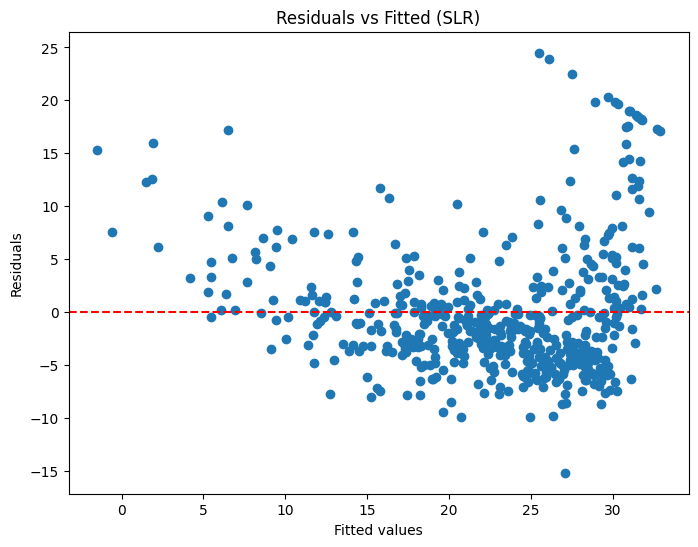

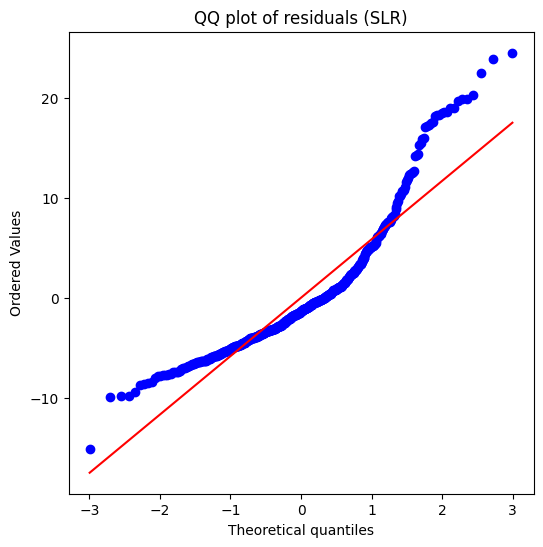

In [6]:
# Regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6)
plt.plot(np.sort(x, axis=0), y_hat_slr[np.argsort(x.ravel())], color='red')
plt.xlabel(best_single)
plt.ylabel(target_col)
plt.title(f"Simple Linear Regression: {target_col} ~ {best_single}")
plt.show()

# Residuals vs fitted
plt.figure(figsize=(8,6))
plt.scatter(y_hat_slr, residuals_slr)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (SLR)")
plt.show()

# QQ plot
plt.figure(figsize=(6,6))
stats.probplot(residuals_slr.ravel(), dist="norm", plot=plt)
plt.title("QQ plot of residuals (SLR)")
plt.show()


In [7]:
X_mlr = np.hstack([np.ones((len(y), 1)), X_all])   # add intercept

XtX_mlr = X_mlr.T @ X_mlr
XtX_inv_mlr = np.linalg.inv(XtX_mlr)
Xty_mlr = X_mlr.T @ y
beta_hat_mlr = XtX_inv_mlr @ Xty_mlr

print("First 10 MLR coefficients:", beta_hat_mlr.ravel()[:10])

# Predictions & metrics
y_hat_mlr = X_mlr @ beta_hat_mlr
residuals_mlr = y - y_hat_mlr
SSE_mlr = np.sum(residuals_mlr**2)
SSR_mlr = np.sum((y_hat_mlr - y.mean())**2)
R2_mlr = SSR_mlr / SST
adjR2_mlr = 1 - (SSE_mlr/(len(y)-X_mlr.shape[1])) / (SST/(len(y)-1))

print(f"MLR R^2 = {R2_mlr:.4f}, Adjusted R^2 = {adjR2_mlr:.4f}")


First 10 MLR coefficients: [ 3.64613519e+01 -2.52625878e-03 -1.08762336e-01  4.80307622e-02
  1.99323137e-02  2.70524534e+00 -1.75416021e+01  3.83922506e+00
 -1.93844593e-03 -1.49330389e+00]
MLR R^2 = 0.7414, Adjusted R^2 = 0.7340


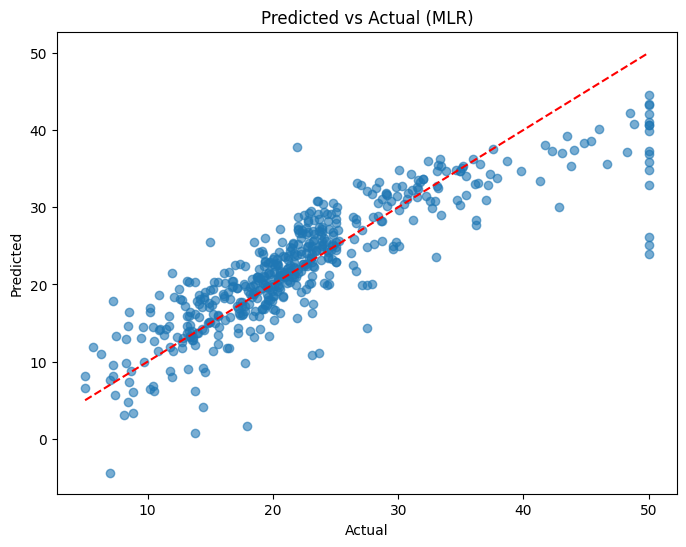

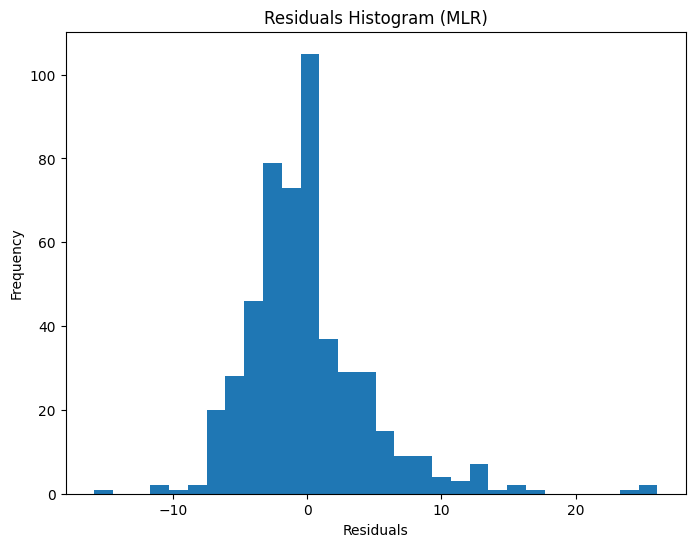

In [8]:
# Predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y, y_hat_mlr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (MLR)")
plt.show()

# Residual histogram
plt.figure(figsize=(8,6))
plt.hist(residuals_mlr, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram (MLR)")
plt.show()


In [9]:
lr = LinearRegression()
lr.fit(X_all, y)

print("Sklearn intercept:", lr.intercept_)
print("Sklearn first 5 coefficients:", lr.coef_.ravel()[:5])


Sklearn intercept: [36.46135187]
Sklearn first 5 coefficients: [-2.52625878e-03 -1.08762336e-01  4.80307622e-02  1.99323137e-02
  2.70524534e+00]
